<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Recurrent Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## First Example

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
#pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

C:\Users\adria\AppData\Local\Temp\ipykernel_10156\1632325378.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [4]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
a = a.reshape((len(a), -1))

In [11]:
a

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [12]:
a.shape

(100, 1)

In [13]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
lags = 3

In [16]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [17]:
g

In [18]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [20]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [22]:
%%time
model.fit(g, epochs=1000, steps_per_epoch=5,
            verbose=False)

CPU times: total: 1min 44s
Wall time: 1min 15s


In [23]:
res = pd.DataFrame(model.history.history)

In [24]:
res.tail(3)

,loss,mae
997,1.159415,0.978617
998,1.327364,1.000324
999,0.308312,0.521992


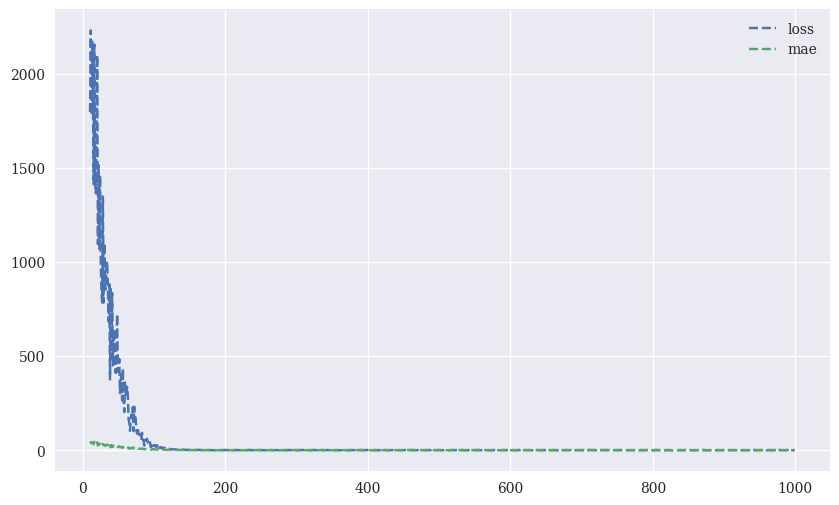

In [25]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [26]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [27]:
x

array([[[21],
        [22],
        [23]]])

In [28]:
y

array([[22.7307]], dtype=float32)

In [29]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=0)
int(round(y[0, 0]))

1/1 [==============================] - 0s 25ms/step


91

In [30]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [31]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1220

## Second Example

In [32]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [33]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

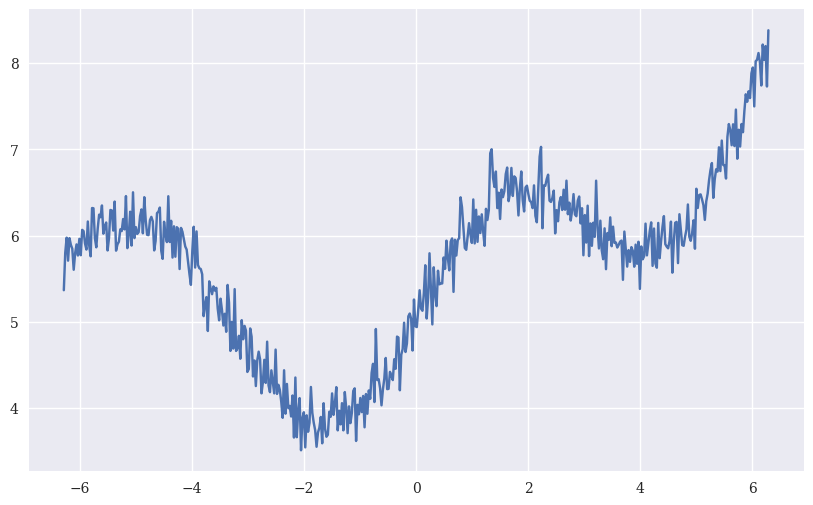

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(x, a);

In [35]:
a = a.reshape((len(a), -1))

In [36]:
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [37]:
lags = 5

In [38]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [39]:
model = Sequential()
model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 500)               251000    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [41]:
%%time
model.fit(g, epochs=500,
          steps_per_epoch=10,
          verbose=False)

CPU times: total: 2min 15s
Wall time: 1min 34s


In [42]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [43]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [44]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))

In [45]:
y = model.predict(f, verbose=False)

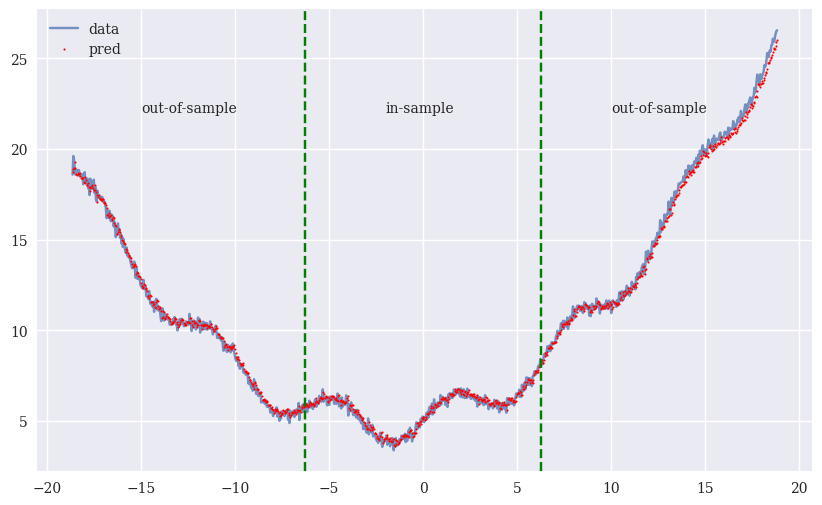

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)
plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')
plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

## Financial Price Series

In [47]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [48]:
symbol = 'EUR_USD'

In [49]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [50]:
raw

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-01 00:00:00,1.0899,1.0897,1.0897,1.0899
2019-10-01 00:01:00,1.0899,1.0896,1.0899,1.0898
2019-10-01 00:02:00,1.0898,1.0896,1.0898,1.0896
2019-10-01 00:03:00,1.0898,1.0896,1.0897,1.0898
2019-10-01 00:04:00,1.0898,1.0896,1.0897,1.0898
...,...,...,...,...
2019-12-31 22:11:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:01:00,1.1212,1.1211,1.1211,1.1211
2019-12-31 23:03:00,1.1212,1.1211,1.1212,1.1211


In [51]:
def generate_data():
    data = pd.DataFrame(raw['CLOSE'])
    data.columns = [symbol]
    data = data.resample('30min', label='right').last().ffill()
    return data

In [52]:
data = generate_data()

In [53]:
data

,EUR_USD
Date,
2019-10-01 00:30:00,1.0899
2019-10-01 01:00:00,1.0896
2019-10-01 01:30:00,1.0892
2019-10-01 02:00:00,1.0890
2019-10-01 02:30:00,1.0886
...,...
2019-12-31 21:30:00,1.1212
2019-12-31 22:00:00,1.1208
2019-12-31 22:30:00,1.1211


In [54]:
data = (data - data.mean()) / data.std()

In [55]:
data

,EUR_USD
Date,
2019-10-01 00:30:00,-2.711169
2019-10-01 01:00:00,-2.758273
2019-10-01 01:30:00,-2.821080
2019-10-01 02:00:00,-2.852483
2019-10-01 02:30:00,-2.915289
...,...
2019-12-31 21:30:00,2.203404
2019-12-31 22:00:00,2.140598
2019-12-31 22:30:00,2.187702


In [56]:
p = data[symbol].values

In [57]:
p

array([-2.7112, -2.7583, -2.8211, ...,  2.1877,  2.1877,  2.1877])

In [58]:
p = p.reshape((len(p), -1))

In [59]:
p

array([[-2.7112],
       [-2.7583],
       [-2.8211],
       ...,
       [ 2.1877],
       [ 2.1877],
       [ 2.1877]])

In [60]:
lags = 5

In [61]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [62]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                           features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                            input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                       input_shape=(lags, features)))
    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
    return model

In [63]:
model = create_rnn_model()

In [64]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10)

Epoch 1/500
10/10 [==============================] - 1s 15ms/step - loss: 1.1005 - mae: 0.9186
Epoch 2/500
10/10 [==============================] - 0s 15ms/step - loss: 1.0346 - mae: 0.7501
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 0.1679 - mae: 0.2692
Epoch 4/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0372 - mae: 0.1404
Epoch 5/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0277 - mae: 0.1187
Epoch 6/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0192 - mae: 0.1234
Epoch 7/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0623 - mae: 0.1535
Epoch 8/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0164 - mae: 0.0938
Epoch 9/500
10/10 [==============================] - 0s 16ms/step - loss: 0.0317 - mae: 0.1434
Epoch 10/500
10/10 [==============================] - 0s 17ms/step - loss: 0.0355 - mae: 0.1517
Epoch 11/500
10/10 [=============================

10/10 [==============================] - 0s 14ms/step - loss: 0.0015 - mae: 0.0259
Epoch 171/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0035 - mae: 0.0391
Epoch 172/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0049 - mae: 0.0485
Epoch 173/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0035 - mae: 0.0396
Epoch 174/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0060 - mae: 0.0522
Epoch 175/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0057 - mae: 0.0508
Epoch 176/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0062 - mae: 0.0438
Epoch 177/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0034 - mae: 0.0484
Epoch 178/500
10/10 [==============================] - 0s 15ms/step - loss: 0.0043 - mae: 0.0467
Epoch 179/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0040 - mae: 0.0428
Epoch 180/500
10/10 [=======================

10/10 [==============================] - 0s 14ms/step - loss: 0.0030 - mae: 0.0382
Epoch 339/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0025 - mae: 0.0404
Epoch 340/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0035 - mae: 0.0411
Epoch 341/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0037 - mae: 0.0379
Epoch 342/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0016 - mae: 0.0315
Epoch 343/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0016 - mae: 0.0302
Epoch 344/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0073 - mae: 0.0632
Epoch 345/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0074 - mae: 0.0540
Epoch 346/500
10/10 [==============================] - 0s 14ms/step - loss: 0.0082 - mae: 0.0609
Epoch 347/500
10/10 [==============================] - 0s 14ms/step - loss: 9.2024e-04 - mae: 0.0209
Epoch 348/500
10/10 [===================

In [66]:
y = model.predict(g, verbose=False)

In [67]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

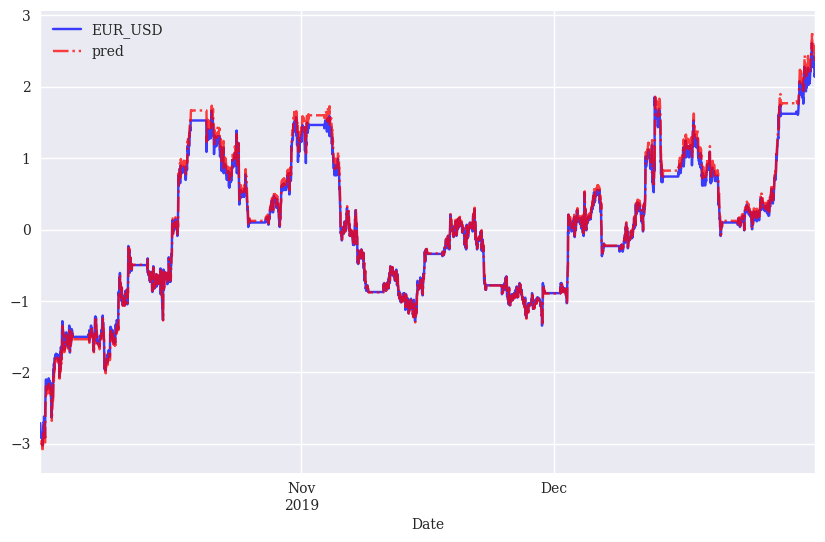

In [68]:
data[[symbol, 'pred']].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

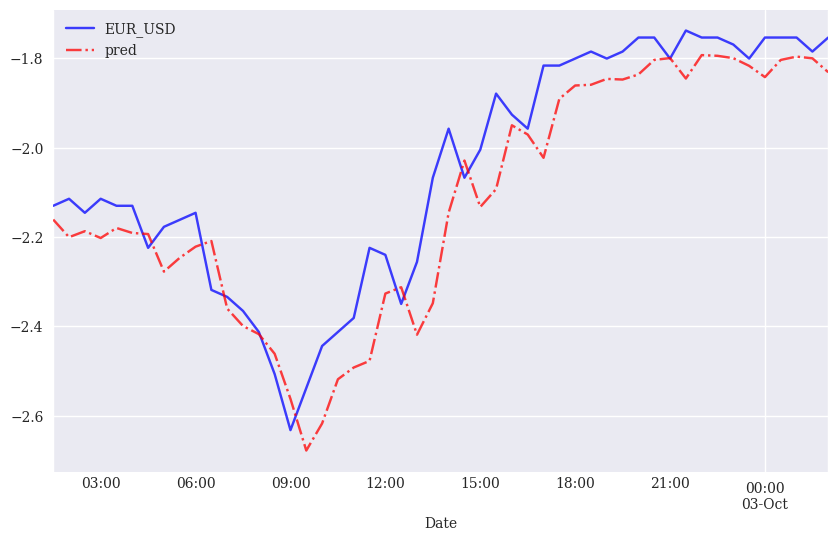

In [69]:
data[[symbol, 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

## Financial Return Series 

In [70]:
data = generate_data()

In [71]:
data

,EUR_USD
Date,
2019-10-01 00:30:00,1.0899
2019-10-01 01:00:00,1.0896
2019-10-01 01:30:00,1.0892
2019-10-01 02:00:00,1.0890
2019-10-01 02:30:00,1.0886
...,...
2019-12-31 21:30:00,1.1212
2019-12-31 22:00:00,1.1208
2019-12-31 22:30:00,1.1211


In [72]:
data['r'] = np.log(data / data.shift(1))

In [73]:
data.dropna(inplace=True)

In [74]:
data = (data - data.mean()) / data.std()

In [75]:
r = data['r'].values

In [76]:
r = r.reshape((len(r), -1))

In [77]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [78]:
list(g)[0]

(array([[[-0.7892],
         [-1.0466],
         [-0.5324],
         [-1.0472],
         [-0.0179]],
 
        [[-1.0466],
         [-0.5324],
         [-1.0472],
         [-0.0179],
         [-0.0179]],
 
        [[-0.5324],
         [-1.0472],
         [-0.0179],
         [-0.0179],
         [ 0.4968]],
 
        [[-1.0472],
         [-0.0179],
         [-0.0179],
         [ 0.4968],
         [ 0.4967]],
 
        [[-0.0179],
         [-0.0179],
         [ 0.4968],
         [ 0.4967],
         [-0.2752]]]),
 array([[-0.0179],
        [ 0.4968],
        [ 0.4967],
        [-0.2752],
        [ 0.2394]]))

In [79]:
model = create_rnn_model()

In [80]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

CPU times: total: 1min 49s
Wall time: 1min 15s


In [81]:
y = model.predict(g, verbose=False)

In [82]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

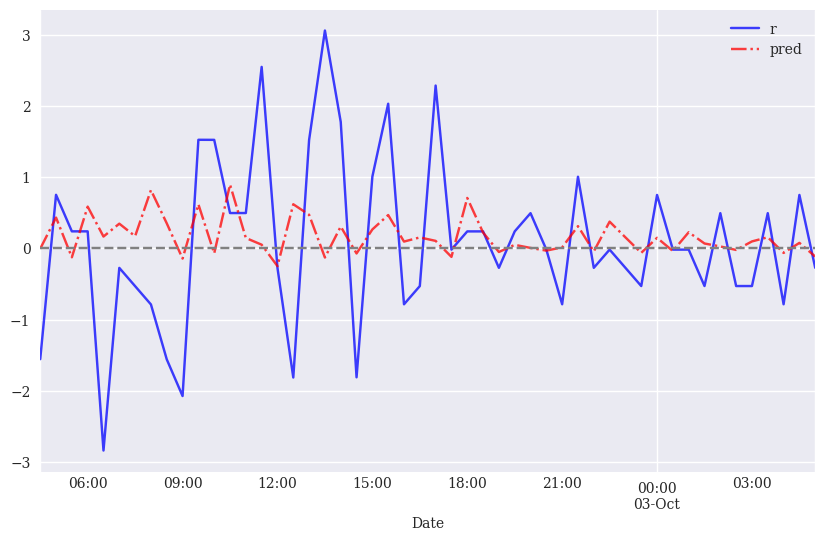

In [83]:
data[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--');

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.6400544341120435

In [86]:
split = int(len(r) * 0.8)

In [87]:
train = r[:split]

In [88]:
test = r[split:]

In [89]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [90]:
set_seeds()
model = create_rnn_model(hu=100)

In [91]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

CPU times: total: 22.1 s
Wall time: 15.8 s


In [92]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)

In [93]:
y = model.predict(g_)

In [94]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.673120728929385

## Financial Features

In [95]:
data = generate_data()

In [96]:
data['r'] = np.log(data / data.shift(1))

In [97]:
data

,EUR_USD,r
Date,,
2019-10-01 00:30:00,1.0899,NaN
2019-10-01 01:00:00,1.0896,-0.000275
2019-10-01 01:30:00,1.0892,-0.000367
2019-10-01 02:00:00,1.0890,-0.000184
2019-10-01 02:30:00,1.0886,-0.000367
...,...,...
2019-12-31 21:30:00,1.1212,-0.000268
2019-12-31 22:00:00,1.1208,-0.000357
2019-12-31 22:30:00,1.1211,0.000268


In [98]:
window = 20
data['mom'] = data['r'].rolling(window).mean()
data['vol'] = data['r'].rolling(window).std()

In [103]:
data.head()

,EUR_USD,r,mom,vol
Date,,,,
2019-10-01 00:30:00,1.0899,NaN,NaN,NaN
2019-10-01 01:00:00,1.0896,-0.000275,NaN,NaN
2019-10-01 01:30:00,1.0892,-0.000367,NaN,NaN
2019-10-01 02:00:00,1.0890,-0.000184,NaN,NaN
2019-10-01 02:30:00,1.0886,-0.000367,NaN,NaN


In [104]:
data.dropna(inplace=True)

### Estimation

In [105]:
split = int(len(data) * 0.8)

In [106]:
train = data.iloc[:split].copy()

In [107]:
mu, std = train.mean(), train.std()

In [108]:
train = (train - mu) / std

In [109]:
test = data.iloc[split:].copy()

In [110]:
test = (test - mu) / std

In [111]:
g = TimeseriesGenerator(train.values, train['r'].values,
                        length=lags, batch_size=5)

In [112]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns),
                         layer='SimpleRNN')

In [113]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10,
                verbose=2)

Epoch 1/100
10/10 - 1s - loss: 0.3048 - mae: 0.3410
Epoch 2/100
10/10 - 0s - loss: 0.6577 - mae: 0.5591
Epoch 3/100
10/10 - 0s - loss: 0.5845 - mae: 0.5114
Epoch 4/100
10/10 - 0s - loss: 0.6270 - mae: 0.5325
Epoch 5/100
10/10 - 0s - loss: 0.4283 - mae: 0.4664
Epoch 6/100
10/10 - 0s - loss: 1.0184 - mae: 0.6129
Epoch 7/100
10/10 - 0s - loss: 0.9612 - mae: 0.5582
Epoch 8/100
10/10 - 0s - loss: 0.5573 - mae: 0.5902
Epoch 9/100
10/10 - 0s - loss: 1.6800 - mae: 0.8182
Epoch 10/100
10/10 - 0s - loss: 1.3117 - mae: 0.6132
Epoch 11/100
10/10 - 0s - loss: 2.2227 - mae: 0.8761
Epoch 12/100
10/10 - 0s - loss: 0.6981 - mae: 0.6244
Epoch 13/100
10/10 - 0s - loss: 1.4819 - mae: 0.7097
Epoch 14/100
10/10 - 0s - loss: 0.5099 - mae: 0.5115
Epoch 15/100
10/10 - 0s - loss: 0.7733 - mae: 0.6217
Epoch 16/100
10/10 - 0s - loss: 0.1559 - mae: 0.1994
Epoch 17/100
10/10 - 0s - loss: 1.0120 - mae: 0.7142
Epoch 18/100
10/10 - 0s - loss: 0.2973 - mae: 0.3405
Epoch 19/100
10/10 - 0s - loss: 0.6159 - mae: 0.5657
Ep

In [114]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)

In [115]:
y = model.predict(g_).flatten()

In [116]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.6864988558352403

### Classification

In [117]:
set_seeds()
model = create_rnn_model(hu=50,
            features=len(data.columns),
            layer='LSTM',
            algorithm='classification')

In [118]:
train_y = np.where(train['r'] > 0, 1, 0)

In [119]:
np.bincount(train_y)

array([2374, 1142], dtype=int64)

In [120]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [121]:
g = TimeseriesGenerator(train.values, train_y,
                        length=lags, batch_size=5)

In [122]:
%%time
model.fit(g, epochs=5, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: total: 3.92 s
Wall time: 3.09 s


In [123]:
test_y = np.where(test['r'] > 0, 1, 0)

In [124]:
g_ = TimeseriesGenerator(test.values, test_y,
                         length=lags, batch_size=5)

In [125]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

In [126]:
np.bincount(y)

array([874], dtype=int64)

In [127]:
accuracy_score(test_y[lags:], y)

0.6864988558352403

### Deep RNNs

In [128]:
from keras.layers import Dropout

In [129]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                     return_sequences=True,
                    ))
    if dropout:
        model.add(Dropout(rate, seed=seed))
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))
    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [130]:
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='SimpleRNN',
            features=len(data.columns),
            dropout=True, rate=0.3)

In [131]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 5, 50)             2750      
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 7,851
Trainable params: 7,851
Non-trainable params: 0
_________________________________________________________________


In [132]:
%%time
model.fit(g, epochs=200, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: total: 1min 31s
Wall time: 1min 5s


In [133]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

In [134]:
np.bincount(y)

array([358, 516], dtype=int64)

In [135]:
accuracy_score(test_y[lags:], y)

0.562929061784897

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>